# Run Energy Rework Equations
An OSRS suggestion by **u/Euronaut**

![Who would win?](Who_would_win.png "Who would win?")


## 1. Drain Rate

### Existing Run Time
> - You can run for up to 90 seconds, regardless of Agility level.
> - A stamina potion reduces your drain rate by 70%, resulting in a run time of up to 300 seconds.


#### Equations
The drain rate equation is

$$
 L(W) = 67 + \bigg \lfloor 67\frac{W}{64} \bigg \rfloor
$$

where $L(W)$ is the energy lost per tick, $W$ is the player weight.   
Minimum weight is 0 kg, maximum is 64 kg.  
Note: 100% run is equivalent to 10,000 energy.

The drain rate with a stamina potion is
$$
L_{stam}(W) = 0.3 \times L(W)
$$

The run time can be calculated from the drain rate using

$$
T(W) = \frac{10,000}{L(W)}
$$

where $T(W)$ is the run time in ticks. This can be multiplied by 0.6 to get the run time in seconds.

---

### Proposed Run Time
> - Your run time increases with Agility level, up to 225 seconds at level 99 Agility.
> - A stamina potion adds a flat 120 seconds of additional run time.
> - 100% run is now equivalent to 100k energy, instead of 10k  
>     $\rightarrow$ (Allows each additional Agility level to give benefits)

#### Equations
The new drain rate equation is

$$
L(A,W) = \bigg \lfloor \bigg( 1 - (0.6)\Big(\frac{A - 1}{98} \Big) \bigg) \bigg(670 + \Big\lfloor 670  \frac{W}{64} \Big\rfloor\bigg) \bigg \rfloor
$$

where $L(A,W)$ is the drain rate in energy per tick, $A$ is the player Agility level and $W$ is the player weight.  
Note: 100% run is equivalent to 100,000 energy.

The drain rate with the stamina potion is now calculated using:

$$
L_{stam}(A,W) = \Bigg \lfloor \frac{100,000}{\frac{100,000}{L(A,W)} + 200} \Bigg\rfloor
$$

were $L_{stam}$ is the new drain rate with a stamina potion in energy per tick. 

The run time calculations are the same as in the existing system.

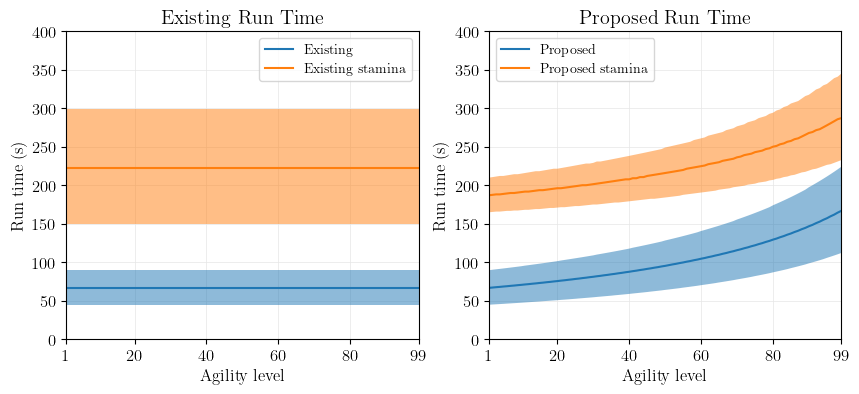

In [185]:
# Drain Rate Calculation and Visualisation

# Set up
import numpy as np
import matplotlib.pyplot as plt


Agility = np.arange(1,100,1) # Agility levels from 1-99
Weight = np.arange(0,65,1) # Weights from 0kg to 64kg

# Initialise variables
L = np.zeros((len(Agility),len(Weight))) # Existing drain rate
Lstam = np.zeros((len(Agility),len(Weight))) # Existing drain rate with stamina potion 
L2 = np.zeros((len(Agility),len(Weight))) # New drain rate
L2stam = np.zeros((len(Agility),len(Weight))) # New drain rate with stamina potion
T = np.zeros((len(Agility),len(Weight))) # Existing run time
Tstam = np.zeros((len(Agility),len(Weight))) # Existing run time with stamina potion 
T2 = np.zeros((len(Agility),len(Weight))) # New run time
T2stam = np.zeros((len(Agility),len(Weight))) # New run time with stamina potion

# Calculate drain rate and run time for all Agility levels and Weights using the equations above
for A in Agility-1:
    for W in Weight:
        L[A,W] = 670 + np.floor(670*np.clip(W,0,64)/64)
        Lstam[A,W] = 0.3*L[A,W]
        L2[A,W] = np.floor((1-A/98*0.6)*L[A,W])
        L2stam[A,W] = np.floor(100000/(100000/L2[A,W] + 200))
        T[A,W]= 100000/L[A,W]*0.6
        Tstam[A,W] = 100000/Lstam[A,W]*0.6
        T2[A,W] = 100000/L2[A,W]*0.6
        T2stam[A,W] = 100000/L2stam[A,W]*0.6
        

# Graphs 

# Set up
plt.rc('text', usetex=True) # Use LaTeX typesetting
plt.rc('font', family='serif')
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots(1, 2, figsize = [10,4])

# Existing Run Time
ax[0].set_title('Existing Run Time')

ax[0].plot(Agility,T[:,22], label='Existing')
ax[0].fill_between(Agility,T[:,0],T[:,64], alpha=0.5)

ax[0].plot(Agility,Tstam[:,22], label='Existing stamina')
ax[0].fill_between(Agility,Tstam[:,0],Tstam[:,64], alpha=0.5)

ax[0].set_xlabel('Agility level')
ax[0].set_ylabel('Run time (s)')

ax[0].set_xlim([1,99])
ax[0].set_xticks([1,20,40,60,80,99])
ax[0].set_ylim([0,400])

ax[0].grid(True,color = [0.9,0.9,0.9],linewidth=0.5)
ax[0].set_axisbelow(True)
ax[0].legend(fontsize=10)

# Proposed Run Time

ax[1].set_title('Proposed Run Time')

ax[1].plot(Agility,T2[:,22], label='Proposed')
ax[1].fill_between(Agility,T2[:,0],T2[:,64], alpha=0.5)

ax[1].plot(Agility,T2stam[:,22], label='Proposed stamina')
ax[1].fill_between(Agility,T2stam[:,0],T2stam[:,64], alpha=0.5)

ax[1].set_xlabel('Agility level')
ax[1].set_ylabel('Run time (s)')

ax[1].set_xlim([1,99])
ax[1].set_xticks([1,20,40,60,80,99])
ax[1].set_ylim([0,400])

ax[1].grid(True,color = [0.9,0.9,0.9],linewidth=0.5)
ax[1].set_axisbelow(True)
ax[1].legend(fontsize=10, loc='upper left')

plt.show()

## 2. Recovery Rate

### Existing Recovery Rate
> - Run recovery rate is constant.
> - It takes 12.5 minutes to recover 100% energy at level 1 Agility (!)
> - Recovery rate at level 99 Agility is 3x as fast.
> - Recovery rate only improves every 6th Agility level.


#### Equations
The recovery rate equation is

$$
 R(A) = \bigg \lfloor \frac{A}{6} \bigg \rfloor + 8
$$

where $R(A)$ is the energy recovered per tick, $A$ is player Agility level.     
Note: 100% run is equivalent to 10,000 energy.

The time to recover 100% energy is given by

$$
T_R(A) = \frac{10,000}{R(A)}
$$

where $T_R(A)$ is the 100% recovery time in ticks. This can be multiplied by 0.6 to get the time in seconds.

---

### Proposed Recovery Rate
> - Recovery rate increases over time, up to 3x the initial rate.
> - It takes 5 minutes to recover 100% energy at 1 Agility.
> - Recovery rate at level 99 Agility is 2.3x as fast. 
> - 100% run is now equivalent to 100k energy, instead of 10k  
>     $\rightarrow$ Recovery rate improves every level.


#### Equations
The new recovery rate equation is



$$
    R(A) = R_1(A) + \bigg\lfloor 10\Big( \frac{t}{15}\Big)  \big( \frac{R_1(A)}{8} \big)\bigg\rfloor
$$

where $R(A)$ is the recovery rate in energy per tick, with a maximum value of $3R_1$, $t$ is the number of ticks since last run, and $R_1(A)$ is the initial recovery rate, given by:

$$
    R_1(A) = \bigg\lfloor \frac{10A}{6} \bigg\rfloor + 80
$$
where $A$ is the player Agility level.  
Note: 100% run is equivalent to 100,000 energy.

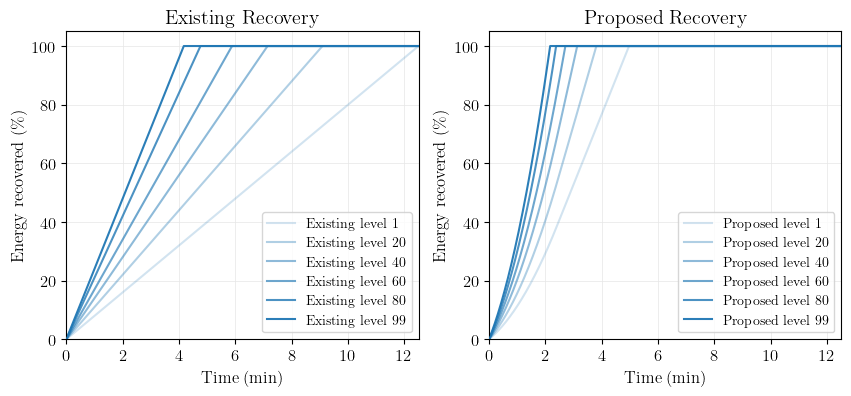

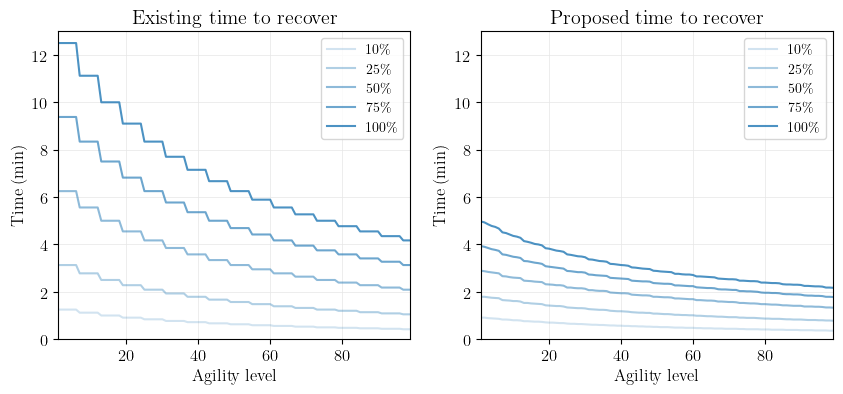

In [186]:
# Recovery Rate Calculation and Visualisation 

ticks = np.arange(0,1301,1) # time in ticks from 0 to 13 minutes
Agility = np.arange(1,100,1) # Agility levels from 1-99

# Initialise variables
R = np.zeros((len(Agility),len(ticks))) # Existing recovery rate
R1 = np.zeros((len(Agility),len(ticks))) # New initial recovery rate
R2 = np.zeros((len(Agility),len(ticks))) # New recovery rate
E = np.zeros((len(Agility),len(ticks))) # Existing recovered energy over time
E2 = np.zeros((len(Agility),len(ticks))) # New recovered energy over time

percentage = np.arange(0,101,1)
T_to_pct = np.zeros((len(Agility),len(percentage)))
T2_to_pct = np.zeros((len(Agility),len(percentage)))

# Calculate recovery rate and total recovered energy over time for all Agility levels using the equations above
for A in Agility-1:
    for t in ticks:
        R[A,t] = np.floor(A/6)+8
        R1[A,t] = np.floor(10*A/6)+80
        R2[A,t] = R1[A,t] + np.floor(10*t/15*R[A,t]/8)
        R2[A,t] = min(R2[A,t], 3*R1[A,t])
        
        if t != 0:
            E[A,t] = E[A,t-1] + R[A,t]
            E[A,t] = min(E[A,t], 10000) # Limit maximum energy to 10k
            E2[A,t] = E2[A,t-1] + R2[A,t]
            E2[A,t] = min(E2[A,t], 100000) # Limit maximum energy to 100k
    
    for pct in percentage:
        T_to_pct[A, pct] = ticks[E[A,:] >= pct*100][0]
        T2_to_pct[A, pct] = ticks[E2[A,:] >= pct*1000][0]

    
# Graphs 

# Set up
plt.rc('text', usetex=True) # Use LaTeX typesetting
plt.rc('font', family='serif')
plt.rcParams['font.size'] = 12

levels = [1,20,40,60,80,99]

fig, ax = plt.subplots(1, 2, figsize = [10,4])

# Existing Run Time
ax[0].set_title('Existing Recovery')

plot_number = 0
for level in levels:
    ax[0].plot(ticks/100,E[level-1,:]/100, label='Existing level '+str(level), zorder=len(levels)-plot_number, color='#1f77b4', alpha=0.2+0.15*plot_number)
    plot_number += 1

ax[0].set_xlabel('Time (min)')
ax[0].set_ylabel('Energy recovered (\%)')

ax[0].set_xlim([0,12.5])
ax[0].set_ylim([0,105])

ax[0].grid(True,color = [0.9,0.9,0.9],linewidth=0.5)
ax[0].set_axisbelow(True)
ax[0].legend(fontsize=10)

# Proposed Run Time

ax[1].set_title('Proposed Recovery')

plot_number = 0
for level in levels:
    ax[1].plot(ticks/100,E2[level-1,:]/1000, label='Proposed level '+str(level), zorder=len(levels)-plot_number,color='#1f77b4', alpha=0.2+0.15*plot_number)
    plot_number += 1

ax[1].set_xlabel('Time (min)')
ax[1].set_ylabel('Energy recovered (\%)')

ax[1].set_xlim([0,12.5])
ax[1].set_ylim([0,105])

ax[1].grid(True,color = [0.9,0.9,0.9],linewidth=0.5)
ax[1].set_axisbelow(True)
ax[1].legend(fontsize=10)


fig, ax = plt.subplots(1, 2, figsize = [10,4])
 
percentages = [10,25,50,75,100]

# Existing Time to Recover

ax[0].set_title('Existing time to recover')

plot_number = 0
for percentage in percentages:
    ax[0].plot(Agility,T_to_pct[:,percentage]/100, label=str(percentage)+'\%',color='#1f77b4', alpha=0.2+0.15*plot_number)
    plot_number += 1

ax[0].set_xlabel('Agility level')
ax[0].set_ylabel('Time (min)')

ax[0].set_xlim([1,99])
ax[0].set_ylim([0,13])

ax[0].grid(True,color = [0.9,0.9,0.9],linewidth=0.5)
ax[0].set_axisbelow(True)
ax[0].legend(fontsize=10)


# Proposed Time to Recover

ax[1].set_title('Proposed time to recover')

plot_number = 0
for percentage in percentages:
    ax[1].plot(Agility,T2_to_pct[:,percentage]/100, label=str(percentage)+'\%',color='#1f77b4', alpha=0.2+0.15*plot_number)
    plot_number += 1

ax[1].set_xlabel('Agility level')
ax[1].set_ylabel('Time (min)')

ax[1].set_xlim([1,99])
ax[1].set_ylim([0,13])

ax[1].grid(True,color = [0.9,0.9,0.9],linewidth=0.5)
ax[1].set_axisbelow(True)
ax[1].legend(fontsize=10)

plt.show()